In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Lectura de Datos

In [2]:
# Importar los datos en un dataframe
pd.set_option('display.max_columns', 80)
data = pd.read_csv('loan.csv',low_memory=False)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analisis de Datos

In [3]:
# Dimensiones de los datos
print('Numero de registros        : {:>10}'.format(data.shape[0]))
print('Numero de caracteristicas  : {:>10}'.format(data.shape[1]))

Numero de registros        :     887379
Numero de caracteristicas  :         74


In [4]:
# Obtener las estadisticas descriptivas
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

Distribucion de la variable loan_status
                                                   loan_amnt                  
                                                       count porcentaje_cuenta
loan_status                                                                   
Charged Off                                            45248              5.10
Current                                               601779             67.82
Default                                                 1219              0.14
Does not meet the credit policy. Status:Charged...       761              0.09
Does not meet the credit policy. Status:Fully Paid      1988              0.22
Fully Paid                                            207723             23.41
In Grace Period                                         6253              0.70
Issued                                                  8460              0.95
Late (16-30 days)                                       2357              0.27
Late (31-120

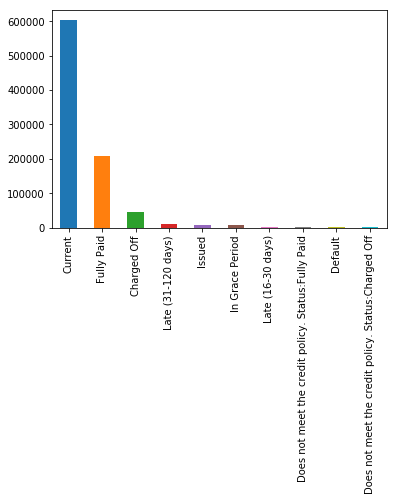

In [5]:
# Se explora la variable target (loan_status)
import warnings
def analisis_agregacion(dataframe,groupby_col,idx_opt,rtype):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=FutureWarning)
        #aggregation_function = {'id':{'cuenta':'count'},'loan_amnt':{'suma':'sum','contador':lambda x: int(sum(x)/data2.loc[x.index].loan_amnt.sum())}}
        if rtype==1:
            aggregation_function = {'loan_amnt':['count','sum']}
        else:
            aggregation_function = {'loan_amnt':['count']}
        data_res=dataframe.groupby(groupby_col,as_index=idx_opt).agg(aggregation_function)
    data_res['loan_amnt','porcentaje_cuenta'] = round(data_res['loan_amnt','count']/data_res['loan_amnt'].sum()[0]*100,2)
    if rtype==1:
        data_res['loan_amnt','tporcentaje_monto'] = round(data_res['loan_amnt','sum']/data_res['loan_amnt'].sum()[1]*100,2)
    return data_res.sort_index(axis=1)

print('==============================================================================================')
print('Distribucion de la variable loan_status')
print(analisis_agregacion(data,'loan_status',True,0))
print('==============================================================================================')
print(f'Presencia de nulos: {np.any(data.loan_status.isnull())}')
data['loan_status'].value_counts().plot(kind='bar');

# Limpieza de Datos

Eliminando registros inconsistentes o no aplicables para analisis.
Eliminado Current. Quedan: 285600
Eliminado Issued. Quedan: 277140
Eliminado Does not meet the credit policy. Status:Fully Paid. Quedan: 275152
Eliminado Does not meet the credit policy. Status:Charged Off. Quedan: 274391
Se eliminaron registros no aplicables
Nueva distribucion:
                   loan_amnt                                                  
                       count porcentaje_cuenta           sum tporcentaje_monto
loan_status                                                                   
Charged Off            45248             16.49  6.586432e+08             17.48
Default                 1219              0.44  1.852130e+07              0.49
Fully Paid            207723             75.70  2.772344e+09             73.60
In Grace Period         6253              2.28  1.000839e+08              2.66
Late (16-30 days)       2357              0.86  3.693575e+07              0.98
Late (31-120 days)   

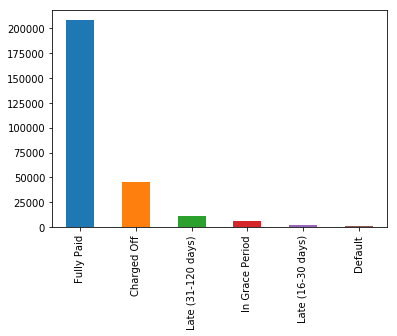

In [27]:
# Se observa que no todos los valores son validos o aplicables al caso.
# Por ello, se filtran los registros inconsistentes o no aplicables para analisis:
#    Current -> No aplicable porque son préstamos dentro de su periodo de pago.
#    Does not meet the credit policy (...) -> Inconsistente. No se sabe si es un error o un valor correcto.
#    Issued -> No aplicable porque son créditos recién emitidos.
#    In grace period -> No aplicable porque son créditos en periodo de gracia.
print('Eliminando registros inconsistentes o no aplicables para analisis.')
estados_eliminar = {'Current','Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued'}
data_clear = data.copy()
for estado in estados_eliminar:
    data_clear.drop(data_clear[data_clear.loan_status==estado].index,inplace=True)
    print(f'Eliminado {estado}. Quedan: {data_clear.count()[0]}')
print('Se eliminaron registros no aplicables')
print('Nueva distribucion:')
print('==============================================================================================')
print(analisis_agregacion(data_clear,'loan_status',True,1))
print('==============================================================================================')
data_clear['loan_status'].value_counts().plot(kind='bar');

# Transformacion de Datos

Creando columna de clase...
Distribucion de la nueva columna:

                         loan_amnt                  
                             count porcentaje_cuenta
clase loan_status                                   
-1    Charged Off            45248             16.49
      Default                 1219              0.44
      In Grace Period         6253              2.28
      Late (16-30 days)       2357              0.86
      Late (31-120 days)     11591              4.22
 1    Fully Paid            207723             75.70


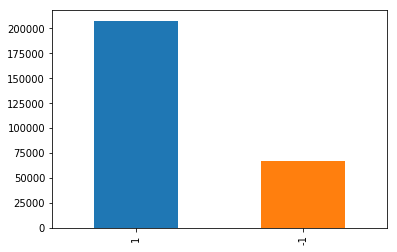

In [28]:
# Se genera la variable de destino (target)
#  -1: prestamo no pagado (no Fully Paid)
#  +1: prestamo pagado    (Fully Paid)
print('Creando columna de clase...')
data_clear['clase'] = 2*(data_clear['loan_status'] == 'Fully Paid')-1
# data_clear['clase'] = 3*(data_clear.loan_status=='Fully Paid') + 2*((data_clear.loan_status=='Late (16-30 days)') | (data_clear.loan_status=='Late (31-120 days)')) + 1*((data_clear.loan_status=='Default') | (data_clear.loan_status=='Charged Off'))
print('==============================================================================================')
print('Distribucion de la nueva columna:')
print('')
print(analisis_agregacion(data_clear,['clase','loan_status'],True,0))
print('==============================================================================================')
data_clear['clase'].value_counts().plot(kind='bar');

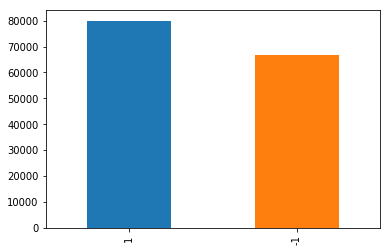

In [29]:
# Balancear el set. Para ello, se quedara con 80k registros de la clase 1
n_rows_to_delete = data_clear[data_clear['clase']==1].count()[0]-80000
data_clear.drop(data_clear[data_clear['clase']==1].sample(n=n_rows_to_delete,random_state=40).index,inplace=True)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore',category=FutureWarning)
    aggregation_function = {'id':{'cuenta':'count'},'loan_amnt':{'suma':'sum'}}
    data_show=data_clear.groupby(['clase','loan_status'],as_index=True).agg(aggregation_function)
data_show['id','porcentaje_cuenta'] = round(data_show['id','cuenta']/data_show['id'].sum()[0]*100,2)
data_show['loan_amnt','porcentaje_monto'] = round(data_show['loan_amnt','suma']/data_show['loan_amnt'].sum()[0]*100,2)
data_show.sort_index(axis=1)
data_clear['clase'].value_counts().plot(kind='bar');

In [30]:
# Explorar los datos categóricos (no numéricos)
data_clear[data_clear.select_dtypes(include='object').columns.tolist()].head(3)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,INDIVIDUAL,NaN
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,INDIVIDUAL,NaN
8,60 months,F,F2,NaN,4 years,OWN,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-2004,f,Apr-2012,NaN,Aug-2012,INDIVIDUAL,NaN


In [31]:
# Del resultado anterior, se observa que se puede procesar emp_length para que sea numerico
# Se crea una columna auxiliar para el procesamiento. Se extrae usando expresiones regulares, se convierte a entero 
# y finalmente se elimina la columna auxiliar
data_clear['emp_length_str'] = data_clear['emp_length'].astype(str)
data_clear['emp_length_prc'] = data_clear['emp_length_str'].apply(lambda x: re.findall('\d+',x)[0] if re.findall('\d+',x)!=[] else 0)
data_clear['emp_length'] = data_clear['emp_length_prc'].astype(int)
data_clear.drop(columns=['emp_length_str','emp_length_prc'],inplace=True)
data_clear.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,clase
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.09,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [32]:
# Tambien se observa que se puede procesar manualmente la columna term para que sea numerica
# Se crea una columna auxiliar para el procesamiento. Se extrae usando expresiones regulares, se convierte a entero 
# y finalmente se elimina la columna auxiliar
data_clear['term_str'] = data_clear['term'].astype(str)
data_clear['term_prc'] = data_clear['term_str'].apply(lambda x: re.findall('\d+',x)[0] if re.findall('\d+',x)!=[] else 0)
data_clear['term'] = data_clear['term_prc'].astype(int)
data_clear.drop(columns=['term_str','term_prc'],inplace=True)
data_clear.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,clase
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,1071795,1306957,5600.0,5600.0,5600.0,60,21.28,152.39,F,F2,NaN,4,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.09,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,1071570,1306721,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,Starbucks,1,RENT,15000.0,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.0,269.29,2.52,Nov-2012,121.45,NaN,Mar-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
12,1064687,1298717,9000.0,9000.0,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0.0,Apr-2004,1.0,NaN,NaN,4.0,0.0,10452.0,91.7,9.0,f,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.0,444.30,4.16,Jul-2012,305.38,NaN,Nov-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [33]:
# Eliminar columnas cuyos nombres contengan id_
print('---------------------------------------------------------')
id_lst=list(map(lambda x: 'id' in x,data_clear.columns))
id_column_name_lst = list(data_clear.columns[id_lst])
print('Eliminando columnas que contengan un id')
print(f'Numero de columnas original: {len(data_clear.columns.tolist())}')
data_clear.drop(columns=id_column_name_lst, axis=1,inplace=True)
print(f'Numero de columnas filtrado: {len(data_clear.columns.tolist())}')

# Eliminar columnas cuyos nombres contengan _d (fechas)
print('---------------------------------------------------------')
id_lst=list(map(lambda x: '_d' in x,data_clear.columns))
id_column_name_lst = list(data_clear.columns[id_lst])
print('Eliminando columnas que contengan un dato que sea fecha (terminan en _d)')
print(f'Numero de columnas original: {len(data_clear.columns.tolist())}')
data_clear.drop(columns=id_column_name_lst, axis=1,inplace=True)
print(f'Numero de columnas filtrado: {len(data_clear.columns.tolist())}')

# Eliminar manualmente columnas de fechas, los campos originales que fueron procesados manualmente 
# y otras que carecen de relevancia
columnas_eliminar = ['url','earliest_cr_line','zip_code','term','emp_length','loan_status']
data_clear.drop(columns=columnas_eliminar,inplace=True)

# Se eliminan las columnas con mas de 10% de valores perdidos (nulos)
print('---------------------------------------------------------')
print('Eliminando columnas con mas de 10% de valores perdidos...')
print(f'Cantidad de columnas originales: {data.shape[1]}')
cols_elim = [x for x in data_clear.columns if data_clear[x].isnull().sum()/data_clear.count().max()>=0.10]
print(f'Cantidad de columnas a eliminar: {len(cols_elim)}')
data_clear.drop(columns=cols_elim,axis=1,inplace=True)
print(f'Cantidad de columnas finales: {data_clear.shape[1]}')

---------------------------------------------------------
Eliminando columnas que contengan un id
Numero de columnas original: 75
Numero de columnas filtrado: 73
---------------------------------------------------------
Eliminando columnas que contengan un dato que sea fecha (terminan en _d)
Numero de columnas original: 73
Numero de columnas filtrado: 66
---------------------------------------------------------
Eliminando columnas con mas de 10% de valores perdidos...
Cantidad de columnas originales: 74
Cantidad de columnas a eliminar: 22
Cantidad de columnas finales: 38


In [35]:
# Buscar las columnas que tienen datos potencialmente categoricos y convertir sus valores de acuerdo al mismo
print('Convirtiendo las categorias nominales en numericas mediante codificacion')
cat_cols = data_clear.select_dtypes(include='object').columns.tolist()
print(f'Se encontraron {len(cat_cols)} columnas por convertir.')
cat_dict = dict()
for col in cat_cols:
    data_clear[col] = data_clear[col].astype('category')
    cat_dict[col] = {i+1:c for i,c in enumerate(data_clear[col].cat.categories)}
    data_clear[col] = data_clear[col].cat.codes+1
print('Columnas convertidas con exito.')

Convirtiendo las categorias nominales en numericas mediante codificacion
Se encontraron 11 columnas por convertir.
Columnas convertidas con exito.


In [36]:
# Se mira la cantidad de categorias que tiene cada columna. Asimismo, se identifican aquellas que tienen una cantidad
# muy alta de categorias distintas (>10% de la cantidad de registros de la columna)
print(f'Eliminando columnas nominales que tienen demasiados valores distintos (limite: 10% del total de la columna)')
debug = True
cols_elim = []
for keys,values in cat_dict.items():
    if debug:
        print(f'{keys} => {len(values)} de {data_clear.count().max()} ({round(100*len(values)/data_clear.count().max(),2)}%)')
    if len(values)/data_clear.count().max() >= 0.1:
        cols_elim.append(keys)
print(f'Cantidad antigua de columnas: {len(data_clear.columns.tolist())}')
data_clear.drop(columns=cols_elim, axis=1, inplace=True)
print(f'Cantidad nueva de columnas: {len(data_clear.columns.tolist())}')

Eliminando columnas nominales que tienen demasiados valores distintos (limite: 10% del total de la columna)
grade => 7 de 146668 (0.0%)
sub_grade => 35 de 146668 (0.02%)
emp_title => 80614 de 146668 (54.96%)
home_ownership => 5 de 146668 (0.0%)
verification_status => 3 de 146668 (0.0%)
pymnt_plan => 2 de 146668 (0.0%)
purpose => 14 de 146668 (0.01%)
title => 26718 de 146668 (18.22%)
addr_state => 51 de 146668 (0.03%)
initial_list_status => 2 de 146668 (0.0%)
application_type => 2 de 146668 (0.0%)
Cantidad antigua de columnas: 38
Cantidad nueva de columnas: 36


In [37]:
# Se rellenan los vacios con la mediana
print('Rellenando vacios con la mediana...')
data_clear = data_clear.fillna(value=data_clear.median())
data_clear = data_clear.reset_index(drop=True)
print('Se rellenaron los vacios.')
print(f'Presencia de nulos: {np.any(data_clear.isnull())}')

Rellenando vacios con la mediana...
Se rellenaron los vacios.
Presencia de nulos: False


In [39]:
# Se analiza el significado de las columnas, y se borran las columnas no relevantes
columnas_eliminar = {#'desc', # desc es la descripcion del credito, puede tener cualquier valor
                     # Información de pagos no puede usarse para predecir un crédito
                     'total_pymnt', 
                     'total_pymnt_inv', 
                     'last_pymnt_amnt',
                     # Información de recuperación de inversión no puede usarse para predecir un crédito
                     'recoveries',  
                     'collection_recovery_fee',
                     'total_rec_prncp',
                     'total_rec_int',
                     'total_rec_late_fee',
                     # Información de saldo deudor no puede usarse para predicción de créditos
                     'out_prncp_inv',
                     'out_prncp',
                     # Información de nomenclaturas no tiene sentido en una predicción de préstamo
                     #'title', # Nombre del préstamo asignado por el prestatario
                     #'emp_title',# Nombre del trabajo asignado por el prestatario
                     'funded_amnt_inv', # Total de inversion de prestamistas hasta dicho momento en el tiempo. 
                                       # No tiene sentido su inclusión porque si se quiere predecir un nuevo préstamo
                                       # todavía no hay inversión alguna
                     'addr_state' # información geográfica no es un criterio financiero para evaluar a un solicitante
                     }
data_clear = data_clear.drop(columns=columnas_eliminar)

# Balanceo de datos

---------------------------------------------------------
Numero de registros        :     146668
 Clase   1                 :      80000 (54.54%)
 Clase  -1                 :      66668 (45.46%)


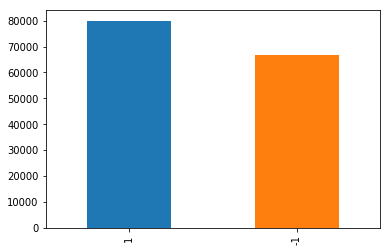

In [40]:
# Dimension de datos resultantes
print('---------------------------------------------------------')
print('Numero de registros        : {:>10}'.format(data_clear.shape[0]))
counts_data_clear = data_clear['clase'].value_counts()
for i in counts_data_clear.index:
    print(' Clase {:>3}                 : {:>10} ({:.2%})'.format(i,counts_data_clear[i],counts_data_clear[i]/data_clear.shape[0]))
data_clear['clase'].value_counts().plot(kind='bar');

# Separacion de datos (entrenamiento y prueba)

In [43]:
from sklearn.model_selection import train_test_split

# Separar el vector de caracteristicas del target
print('---------------------------------------------------------')
print('Se separa el vector de caracteristicas del target')
X = data_clear[data_clear.drop(columns=['clase'],axis=1).columns.tolist()]
y = data_clear['clase']
print(f'Las dimensiones de X son: {X.shape}')
print(f'Las dimensiones de y son: {y.shape}')

# Separar el conjunto de entrenamiento/validacion del conjunto de prueba
print('---------------------------------------------------------')
print('Separando el conjunto de entrenamiento del de pruebas')
print('El tamaño original de X es                   : {:>7}'.format(len(X)))
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print('El tamaño del set de entrenamiento es        : {:>7}'.format(len(X_trainval)))
print('El tamaño del set de pruebas es              : {:>7}'.format(len(X_test)))
print('El tamaño del set entrenamiento + pruebas es : {:>7}'.format(len(X_trainval+X_test)))

---------------------------------------------------------
Se separa el vector de caracteristicas del target
Las dimensiones de X son: (146668, 23)
Las dimensiones de y son: (146668,)
---------------------------------------------------------
Separando el conjunto de entrenamiento del de pruebas
El tamaño original de X es                   :  146668
El tamaño del set de entrenamiento es        :  117334
El tamaño del set de pruebas es              :   29334
El tamaño del set entrenamiento + pruebas es :  146668


In [44]:
from sklearn.preprocessing import StandardScaler

# Normalizar el conjunto de entrenamiento/validacion
print('---------------------------------------------------------')
print('Ejecutando normalizacion...')
scaler = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
print('Set de pruebas normalizado')

---------------------------------------------------------
Ejecutando normalizacion...
Set de pruebas normalizado


# Analisis de caracteristicas por modelo de clasificacion

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

## Arbol de Decision

### Usando Random Forest

In [47]:
# Se utiliza el modelo Random Forest para sacar las caracteristicas mas relevantes
# segun este modelo
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

tree_model = tree.DecisionTreeClassifier(splitter='random',criterion='entropy')
pipe = Pipeline(steps=[('feature_selection',SelectFromModel(RandomForestClassifier(n_estimators=10))),
                       ('classification', tree_model)])
p_max_depth = [2,4,6,8,10]
p_min_samples_leaf = [2,4,6]
param_grid = [
    {
        'classification__max_depth'   : p_max_depth,
        'classification__min_samples_leaf': p_min_samples_leaf
    }
]
grid = GridSearchCV(pipe, cv=10, n_jobs=10, param_grid=param_grid, return_train_score=True, verbose=10)
grid.fit(X_trainval,y_trainval)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6178626214419636, total=  10.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classifica

[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   11.3s


[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.5889371857155032, total=  10.7s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.5901304014318589, total=  10.7s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.5945277872485509, total=  10.7s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6146241690813022, total=  12.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samp

[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   23.7s


[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6218680756775183, total=  12.3s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6217506179152816, total=  12.3s
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6135162774842339, total=  12.5s
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.618597119236342, total=  12.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.61604022841558, total=  12.4s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   35.2s


[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6006476904721323, total=  11.6s
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6043974774160559, total=  11.9s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.5994545764445202, total=  11.7s
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6001363558888699, total=  11.6s
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6060683542146084, total=  11.6s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6127162703485894, total=  11.6s
[CV] classification__max_depth=4, classification__

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   37.0s


[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6340548832452702, total=  10.5s
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6315834327595024, total=  10.5s
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.632606101926027, total=  10.7s
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.632606101926027, total=  10.4s
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6438251086678599, total=  10.4s
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6325208794954

[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   56.9s


[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6291119822737344, total=  10.7s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6117266064428157, total=  10.6s
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6249360831770923, total=  11.0s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.628344980398841, total=  10.8s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.615187931475326, total=  10.9s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6347055314071

[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  1.2min


[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6185444008863132, total=  15.1s
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6352479972728822, total=  14.9s
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6264700869268791, total=  15.2s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6278871558851103, total=  15.1s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6260121026165516, total=  15.0s
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.64169436631

[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:  1.4min


[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6304440467058723, total=  11.6s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6411829881530725, total=  11.8s
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6356430580414216, total=  11.6s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6312111139521009, total=  11.6s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6336515513126492, total=  11.7s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classificatio

[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:  1.7min


[CV] classification__max_depth=6, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=4, score=0.6442209341970678, total=  12.4s
[CV] classification__max_depth=6, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6269814215101415, total=  10.7s
[CV] classification__max_depth=8, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6327765467871144, total=  10.7s
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6299642065791716, total=  10.3s
[CV] classification__max_depth=8, classification__min_samples_leaf=2 .
[CV] classification__max_depth=8, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6323504346343958, total=  10.8s
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.63209476734

[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:  2.0min


[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6351627748423385, total=  11.8s
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6344809953979887, total=  11.7s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6433989601977329, total=  11.9s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6439955680559106, total=  11.9s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6376885706980312, total=  11.9s
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.63572828773

[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.3min


[CV]  classification__max_depth=8, classification__min_samples_leaf=4, score=0.6398193130486661, total=  11.9s
[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=4, score=0.639618138424821, total=  12.0s
[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6332878813703767, total=  13.7s
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6365263337310381, total=  13.7s
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6354184421339697, total=  13.6s
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV]  classification

[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:  2.7min


[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6417795960112503, total=  11.1s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6380294894741327, total=  11.3s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.637432881615955, total=  11.1s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6366348448687351, total=  11.0s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=4, score=0.6333731038009204, total=  11.0s
[CV] classification__max_depth=10, classification__min_samples_leaf=6 
[CV]  classific

[Parallel(n_jobs=10)]: Done 147 out of 150 | elapsed:  3.1min remaining:    3.7s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:  3.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min...    min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'))]),
       fit_params=None, iid=True, n_jobs=10,
       param_grid=[{'classification__max_depth': [2, 4, 6, 8, 10], 'classification__min_samples_leaf': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [48]:
grid.best_params_

{'classification__max_depth': 8, 'classification__min_samples_leaf': 4}

In [49]:
# Las caracteristicas con valore en True son relevantes para el modelo
feature_list_by_randomforest = [x[0] for x in zip(X_trainval.columns,grid.best_estimator_.named_steps['feature_selection'].get_support()) if x[1]==True]
feature_list_by_randomforest

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'sub_grade',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc']

In [51]:
[x for x in zip(grid.cv_results_['params'],grid.cv_results_['mean_test_score'])]

[({'classification__max_depth': 2, 'classification__min_samples_leaf': 2},
  0.6064141681013177),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 4},
  0.6161129766308145),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 6},
  0.6038488417679445),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 2},
  0.6364054749688922),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 4},
  0.6265873489355174),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 6},
  0.6283515434571394),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 2},
  0.633652649700854),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 4},
  0.6387406889733581),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 6},
  0.6341554877529105),
 ({'classification__max_depth': 8, 'classification__min_samples_leaf': 2},
  0.6378458076942745),
 ({'classification__m

In [52]:
[x for x in zip(grid.cv_results_['params'],grid.cv_results_['std_test_score'])]

[({'classification__max_depth': 2, 'classification__min_samples_leaf': 2},
  0.014343653752090875),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 4},
  0.0037548200291835907),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 6},
  0.004631783031881998),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 2},
  0.004892602182409834),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 4},
  0.0072549270370705415),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 6},
  0.007800805933837021),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 2},
  0.003795085106433055),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 4},
  0.0045763015019167335),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 6},
  0.004615235683400236),
 ({'classification__max_depth': 8, 'classification__min_samples_leaf': 2},
  0.003226425578165613

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

tree_model_2 = tree.DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=8,min_samples_leaf=4)
tree_model_2 = tree_model_2.fit(X_trainval[feature_list_by_randomforest],y_trainval)
y_pred_tree  = tree_model_2.predict(X_test[feature_list_by_randomforest])
print(f'Accuracy  = {accuracy_score(y_test,y_pred_tree)}')
print(f'Precision = {precision_score(y_test, y_pred_tree)}') 

Accuracy  = 0.6370082498125043
Precision = 0.6534893102057281


### Usando Nothing

In [57]:
tree_model = tree.DecisionTreeClassifier(splitter='random',criterion='entropy')
pipe = Pipeline(steps=[('classification', tree_model)])
p_max_depth = [2,4,6,8,10]
p_min_samples_leaf = [2,4,6]
param_grid = [
    {
        'classification__max_depth'   : p_max_depth,
        'classification__min_samples_leaf': p_min_samples_leaf
    }
]
grid = GridSearchCV(pipe, cv=10, n_jobs=10, param_grid=param_grid, return_train_score=True, verbose=10)
grid.fit(X_trainval,y_trainval)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6122379410260781, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6118118288733595, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6168399522754389, total=   0.4s
[CV] classification__max_depth=2, classification__min_samples_leaf=2 .
[CV] classification__max_depth=2, cl

[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    1.2s


[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6164663768857069, total=   0.5s
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6135685672888435, total=   0.4s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6178626214419636, total=   0.2s
[CV]  classification__max_depth=2, classification__min_samples_leaf=2, score=0.6177122400272759, total=   0.4s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6226350775524118, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classificatio

[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    2.0s


[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6231464121356741, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6312963436461263, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6346203017131169, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6267791698627801, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6259268729225262, total=   0.2s
[CV]  classification__max_depth=2, classification__min_samples_leaf=4, score=0.6326287078077054, total=   0.1s
[CV] classification__max_depth=2, classification__

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    2.8s


[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6299642065791716, total=   0.1s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6286006476904721, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6303588170118469, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6429728117276059, total=   0.2s
[CV] classification__max_depth=2, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=2, classification__min_samples_leaf=6, score=0.6332566266087105, total=   0.1s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classificatio

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.7s


[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6166695074143514, total=   0.4s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6274927560934038, total=   0.4s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6251065280381797, total=   0.5s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.6234020794273053, total=   0.5s
[CV] classification__max_depth=4, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=2, score=0.629878984148628, total=   0.5s
[CV] classification_

[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    5.4s


[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6291119822737344, total=   0.6s
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6228055224134992, total=   0.5s
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6193114027612068, total=   0.5s
[CV] classification__max_depth=4, classification__min_samples_leaf=4 .
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6293360606835422, total=   0.6s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.6355578283473963, total=   0.6s
[CV] classification__max_depth=4, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=4, score=0.62959174976

[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    7.0s


[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6271518663712289, total=   0.7s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.633799215953639, total=   0.7s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6312111139521009, total=   0.6s
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6430580414216313, total=   0.7s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.6321486405863803, total=   0.6s
[CV] classification__max_depth=6, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=4, classification__min_samples_leaf=6, score=0.626949629250831, total=   0.6s
[CV] classification__max_depth=6, classification__mi

[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    9.0s


[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6439955680559106, total=   1.0s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6422909741754027, total=   1.0s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6344498423250661, total=   1.1s
[CV]  classification__max_depth=6, classification__min_samples_leaf=2, score=0.6403000340947835, total=   1.1s
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV] classification__max_depth=6, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=4, score=0.6335435486620078, total=   1.2s
[CV] classification

[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   10.9s


[CV] classification__max_depth=6, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=4, score=0.6343646126310406, total=   1.2s
[CV]  classification__max_depth=6, classification__min_samples_leaf=4, score=0.6451585407432663, total=   1.1s
[CV] classification__max_depth=6, classification__min_samples_leaf=6 .
[CV] classification__max_depth=6, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6297937617180842, total=   1.2s
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6333731038009204, total=   1.2s
[CV] classification__max_depth=8, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.6350775524117948, total=   1.2s
[CV] classification__max_depth=8, classification__min_samples_leaf=2 .
[CV]  classification__max_depth=6, classification__min_samples_leaf=6, score=0.63405488324

[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:   13.7s


[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6350775524117948, total=   1.6s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6381455599113687, total=   1.6s
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6372624222279042, total=   1.6s
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6454444728543425, total=   1.4s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.6411829881530725, total=   1.5s
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV] classification__max_depth=8, classification__min_samples_leaf=4 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=2, score=0.64109775845

[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   16.5s


[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=4, score=0.6413228775997273, total=   1.5s
[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV] classification__max_depth=8, classification__min_samples_leaf=6 .
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6345662178285325, total=   1.6s
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6342253281063576, total=   1.6s
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6333731038009204, total=   1.5s
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV] classification__max_depth=10, classification__min_samples_leaf=2 
[CV]  classification__max_depth=8, classification__min_samples_leaf=6, score=0.6356741094256008, total=   1.6s
[CV] classification

[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:   20.3s


[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.639989772436717, total=   1.8s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6392227051904884, total=   1.8s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6339384641609137, total=   1.9s
[CV]  classification__max_depth=10, classification__min_samples_leaf=2, score=0.6444766450733038, total=   1.9s
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV] classification__max_depth=10, classification__min_samples_leaf=4 
[CV]  classification__max_depth=10, classification__min_samples_leaf=4, score=0.6367820010226691, total=   1.9s
[CV]  classification__max_depth=10, classification__min_samples_leaf=4, score=0.627833

[Parallel(n_jobs=10)]: Done 147 out of 150 | elapsed:   24.6s remaining:    0.5s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:   24.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('classification', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'))]),
       fit_params=None, iid=True, n_jobs=10,
       param_grid=[{'classification__max_depth': [2, 4, 6, 8, 10], 'classification__min_samples_leaf': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [58]:
grid.best_params_

{'classification__max_depth': 8, 'classification__min_samples_leaf': 2}

In [59]:
[x for x in zip(grid.cv_results_['params'],grid.cv_results_['mean_test_score'])]

[({'classification__max_depth': 2, 'classification__min_samples_leaf': 2},
  0.616777745580991),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 4},
  0.6262975778546713),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 6},
  0.6299111936863995),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 2},
  0.6293998329554946),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 4},
  0.62754188896654),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 6},
  0.6300560792268226),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 2},
  0.6360560451361071),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 4},
  0.6377179675115482),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 6},
  0.6361668399611365),
 ({'classification__max_depth': 8, 'classification__min_samples_leaf': 2},
  0.6382378509213016),
 ({'classification__max

In [60]:
[x for x in zip(grid.cv_results_['params'],grid.cv_results_['std_test_score'])]

[({'classification__max_depth': 2, 'classification__min_samples_leaf': 2},
  0.003833132400927799),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 4},
  0.004898911453318587),
 ({'classification__max_depth': 2, 'classification__min_samples_leaf': 6},
  0.005819009496344339),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 2},
  0.007216519425046422),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 4},
  0.004673056984632347),
 ({'classification__max_depth': 4, 'classification__min_samples_leaf': 6},
  0.005273963809231623),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 2},
  0.004955168578633629),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 4},
  0.005546115520122624),
 ({'classification__max_depth': 6, 'classification__min_samples_leaf': 6},
  0.0040818364681827),
 ({'classification__max_depth': 8, 'classification__min_samples_leaf': 2},
  0.0046753712570566965),
 

In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

tree_model_2 = tree.DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=8,min_samples_leaf=2)
tree_model_2 = tree_model_2.fit(X_trainval,y_trainval)
y_pred_tree  = tree_model_2.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test,y_pred_tree)}')
print(f'Precision = {precision_score(y_test, y_pred_tree)}') 

Accuracy  = 0.6385763959910002
Precision = 0.6621205720837607


In [ ]:
En base  a la precisión, escoger Nothing

In [63]:
[x for x in sorted(zip(X_trainval,tree_model_2.feature_importances_),key=(lambda x:x[1]),reverse=True)]

[('int_rate', 0.5477922996146413),
 ('sub_grade', 0.14832692607306197),
 ('grade', 0.12190790459313992),
 ('dti', 0.08749161037976382),
 ('initial_list_status', 0.01831250811204329),
 ('home_ownership', 0.013936672273308635),
 ('loan_amnt', 0.008150022034796646),
 ('annual_inc', 0.007482643151428435),
 ('installment', 0.007220157293992132),
 ('total_acc', 0.006433786850607916),
 ('verification_status', 0.005663537385094315),
 ('pub_rec', 0.0052092290182299324),
 ('revol_util', 0.004482462567707621),
 ('delinq_2yrs', 0.004452043950671779),
 ('funded_amnt', 0.0036293257146016145),
 ('open_acc', 0.0026797909413273954),
 ('purpose', 0.0025231310891107714),
 ('inq_last_6mths', 0.002489041031758424),
 ('revol_bal', 0.0018169079247141327),
 ('pymnt_plan', 0.0),
 ('collections_12_mths_ex_med', 0.0),
 ('policy_code', 0.0),
 ('application_type', 0.0)]

## Caracteristicas por Regresion Logistica

In [121]:
# Se utiliza el modelo Logitic Regression para sacar las caracteristicas mas relevantes
# segun este modelo
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
selector_logistico = RFE(estimator=modelo_logistico)
#selector_logistico = selector_logistico.fit(X_trainval_scaled,y_trainval)
pipe = Pipeline(steps=[('reducir_dim', selector_logistico), ('logistic', modelo_logistico)])

n_caracteristicas = list(range(10,len(X_trainval.columns)-5,10))
c_valores = [0.1]

param_grid = [
    {
        'reducir_dim__n_features_to_select': n_caracteristicas,
        'logistic__C': c_valores
    }
]

grid = GridSearchCV(pipe, cv=10, n_jobs=10, param_grid=param_grid, return_train_score=False, verbose=1)
grid.fit(X_trainval,y_trainval)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=10 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.9934275386132106, total= 4.0min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=

[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  4.6min


[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.9907985540584949, total= 4.8min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.9902519167579409, total= 4.9min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.992988606485539, total= 4.9min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.9906879929886064, total= 5.0min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=10, score=0.9932092004381161, total= 5.8min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=20 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.9935370796363238, total= 3.5min
[CV] logistic__C=0.1, reducir_dim__n_fea

[Parallel(n_jobs=10)]: Done  15 out of  30 | elapsed:  8.8min remaining:  8.8min


[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.9955083260297984, total= 4.0min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=30 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.994413407821229, total= 4.4min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=30 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.995398773006135, total= 4.5min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=30 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.9955093099671413, total= 5.3min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=30 ...........


[Parallel(n_jobs=10)]: Done  19 out of  30 | elapsed:  9.8min remaining:  5.6min


[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=20, score=0.9932077125328659, total= 4.7min
[CV] logistic__C=0.1, reducir_dim__n_features_to_select=30 ...........
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9952897360061344, total= 2.3min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9946330777656078, total= 3.2min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9935377875136912, total= 3.2min


[Parallel(n_jobs=10)]: Done  23 out of  30 | elapsed: 11.7min remaining:  3.6min


[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9957279000985869, total= 2.9min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9955088180523606, total= 2.9min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9952892199824716, total= 2.5min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9946324898674553, total= 2.9min


[Parallel(n_jobs=10)]: Done  27 out of  30 | elapsed: 12.1min remaining:  1.3min


[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9958378970427163, total= 3.6min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9959465381244522, total= 2.4min
[CV]  logistic__C=0.1, reducir_dim__n_features_to_select=30, score=0.9945223488168273, total= 1.8min


[Parallel(n_jobs=10)]: Done  30 out of  30 | elapsed: 12.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reducir_dim', RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=10,
       param_grid=[{'reducir_dim__n_features_to_select': [10, 20, 30], 'logistic__C': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=10)

In [138]:
grid.best_estimator_.named_steps['reducir_dim'].get_support()

array([False,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [143]:
feature_list_by_log_regression = [x for i,x in enumerate(X_trainval.columns) if grid.best_estimator_.named_steps['reducir_dim'].get_support()[i] ]

In [179]:
feature_list_by_log_regression

['funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'policy_code',
 'application_type']

## Caracteristicas por XGBoost

In [167]:
xgb = XGBClassifier()
rfe_xgb = RFE(estimator=xgb, n_features_to_select=30, step=10, verbose=2)
rfe_xgb.fit(X_trainval,y_trainval)

Fitting estimator with 39 features.


RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
  n_features_to_select=30, step=10, verbose=2)

In [163]:
# Se utiliza el modelo Naive Bayes para sacar las caracteristicas mas relevantes
# segun este modelo
from xgboost import XGBClassifier

xgb = XGBClassifier()
rfe_xgb = RFE(estimator=xgb)
n_caracteristicas = list(range(10,len(X_trainval.columns)-5,10))
#rfe_xgb.fit(X_trainval,y_trainval)
pipe = Pipeline(steps=[('reducir_dim', rfe_xgb)])
param_grid = [
    {
        'reducir_dim__n_features_to_select': n_caracteristicas
    }
]

grid = GridSearchCV(pipe, cv=10, n_jobs=5, param_grid=param_grid, return_train_score=False, verbose=1)
grid.fit(X_trainval,y_trainval)
#xgb_selected_columns = [X_trainval.columns.values[i] for i in range(len(X_trainval.columns.values)) if  rfe_xgb.support_[i]]



Fitting 10 folds for each of 3 candidates, totalling 30 fits


/home/kref/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/kref/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/kref/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/kref/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

KeyboardInterrupt: 

In [162]:
xgb_selected_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'open_acc',
 'revol_bal',
 'revol_util',
 'out_prncp',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'policy_code',
 'application_type']

## Caracteristicas por MLP

In [169]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
rfe_mlp = RFE(estimator=mlp, n_features_to_select=30, step=10, verbose=2)
rfe_mlp.fit(X_trainval,y_trainval)


Fitting estimator with 39 features.


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

## Seleccion de caracteristicas comunes

In [174]:
type(xgb_selected_columns)

list

In [181]:
selected_columns = [x for x in xgb_selected_columns if (x in feature_list_by_randomforest) and (x in feature_list_by_log_regression) ]
selected_columns

['funded_amnt',
 'installment',
 'out_prncp',
 'total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt']

In [183]:
# Columnas a eliminar segun la mascara generada
columns_to_be_dropped = [i for i in X_trainval.columns.values if i not in selected_columns ]
columns_to_be_dropped

['loan_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type']

In [185]:
# Se remueve los datos referentes a las caracteristicas a eliminar
X_trainval_reduced = X_trainval.drop(columns_to_be_dropped,axis=1)
X_test_reduced = X_test.drop(columns_to_be_dropped, axis=1)

## Construir Clasificador Final

In [186]:
# Construccion del clasificador con instancias comunes
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_trainval_reduced, y_trainval)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Evaluar Modelo

In [188]:
# Se importan librerias relacionadas a la evaluacion de modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [189]:
# Se predice la clase para los datos de prueba
y_pred = clf.predict(X_test_reduced)

In [192]:
# funcion para general el grafico de matriz de confusion
# adaptado de: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [193]:
# matriz de confusion
cnf_matrix = confusion_matrix(y_test, y_pred)

In [194]:
# Etiqueta de las clases
class_names = ['No Pagado','Pagado']

Confusion matrix, without normalization
[[18033    45]
 [    6 21041]]


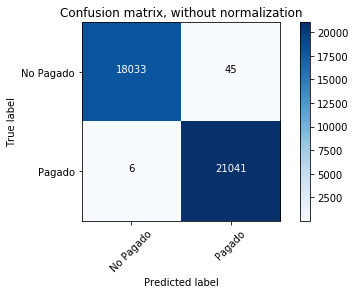

In [195]:
# Se genera la grafica de la matriz de confusion
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [196]:
# Metricas parfa la evaluacion de resultados
# tn = veraderos negativos
# fp = falsos positivos
# fn = falsos negativos
# tp = verdaderos positivos
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [197]:
# Se imprimen las metricas para evaluar los resultados
print(f'score del modelo : {clf.score(X_test_reduced, y_test)}')
print(f'precison         : {(tp)/(tp+fp)}')
print(f'recall           : {tp/(tp+fn)}')

score del modelo : 0.9986964856230032
precison         : 0.9978658825761169
recall           : 0.999714923742101
